In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [3]:
(X_train, y_train), (X_test, y_test)=keras.datasets.mnist.load_data()
X_train=X_train/255
X_test=X_test/255

In [4]:
len(X_train)

60000

3

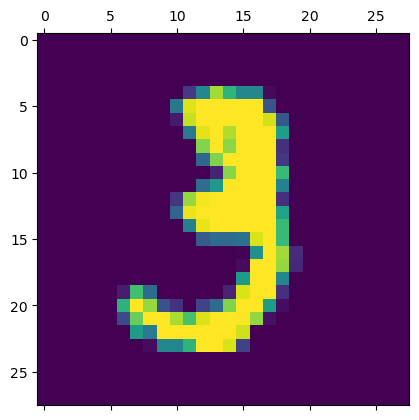

In [5]:
# the dataset is actually collection of 2 dimentional array having values from 0 to 256 representing images of different number
# show the example

plt.matshow(X_train[10])
# heading of respective image
y_train[10]

In [6]:
# here every image is 28 x 28 pixel. In order to submit this image to  neurons, we have to first "Flatten"  the image data
X_train_flatten=X_train.reshape(len(X_train),28*28)
X_test_flatten=X_test.reshape(len(X_test),28*28)


In [7]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4714 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3047 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2838 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2668 - accuracy: 0.9255


In [8]:
# so got good accuracy of 92%
# lets evaluate on test dataset

model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 0s 898us/step - loss: 0.2658 - accuracy: 0.9252


[0.26582998037338257, 0.9251999855041504]

In [9]:
# Predicting using test dataset
y_predicted=model.predict(X_test_flatten)

313/313 [==============================] - 1s 766us/step


In [10]:
print(y_predicted[1])

[2.2193256e-01 3.9637759e-03 9.9930471e-01 3.5762399e-01 9.8902975e-10
 8.6232686e-01 9.1182363e-01 4.3652183e-13 9.0124384e-02 1.1411162e-09]


In [11]:
# as you can see, when we print the y_predicted, it gives probability of prediction for every number from 0 to 9
# lets print the probability in percent
print(y_predicted[1]*100)

[2.2193256e+01 3.9637759e-01 9.9930473e+01 3.5762398e+01 9.8902973e-08
 8.6232689e+01 9.1182365e+01 4.3652183e-11 9.0124388e+00 1.1411162e-07]


In [12]:
for i in range(0,len(y_predicted[1])):
    print(i,'=',y_predicted[1][i]*100)

0 = 22.19325602054596
1 = 0.3963775932788849
2 = 99.9304711818695
3 = 35.762399435043335
4 = 9.890297469894449e-08
5 = 86.23268604278564
6 = 91.18236303329468
7 = 4.3652183105181985e-11
8 = 9.012438356876373
9 = 1.1411162015306786e-07


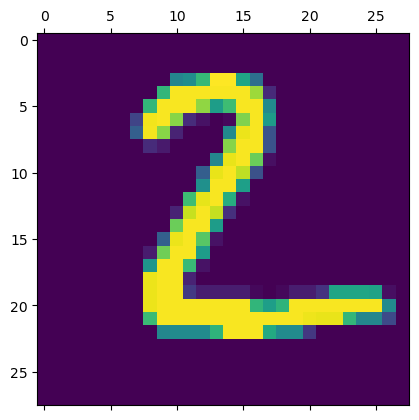

In [13]:
# so maximum probability is with number '2'
#lets check if it matched with the actual number in test at location [1]

plt.matshow(X_test[1])

In [14]:
# lets check for other number

for i in range(0,len(y_predicted[5])):
    print(i,'=',y_predicted[5][i]*100)

0 = 0.004019660264020786
1 = 99.84102249145508
2 = 50.937676429748535
3 = 41.3273960351944
4 = 0.9594478644430637
5 = 2.185254544019699
6 = 1.2353815138339996
7 = 57.57371783256531
8 = 47.98685610294342
9 = 16.780491173267365


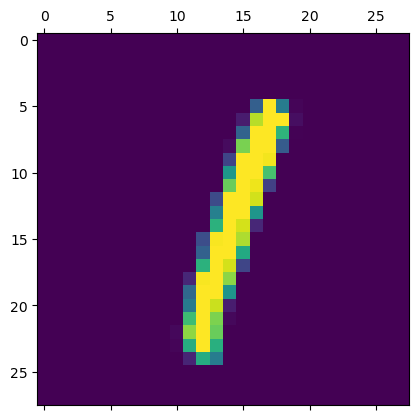

In [15]:
plt.matshow(X_test[5])

In [16]:
# so the model looks fairly good with accuracy upto 92 %

In [17]:
# now to get the actually feel of the entire model and how its functioning, lets plot a cofusion matrix
# we will do this with builtin method called confusion_matrix' in tensorflow. 
# but before we can do that, we should convert all the labels of test data into an array

y_predicted_labels= [np.argmax(i) for i in y_predicted]

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)   

In [18]:
#Here the y_predicted are array of whole numbers for every predicted image and y_test which is true value are integers
#Hence to plot heat map, first we will take out the label which has max percentage of prediction and then use it to plot against Thruth value / Test set 
y_predicted_labels
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 950,    0,    1,    2,    1,    7,   15,    2,    1,    1],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   4,    9,  923,   16,   15,    4,   14,   10,   32,    5],
       [   1,    0,   17,  929,    1,   23,    4,    9,   17,    9],
       [   1,    2,    2,    1,  921,    0,   12,    3,    5,   35],
       [   7,    3,    2,   31,   12,  780,   19,    5,   25,    8],
       [   6,    3,    4,    1,    8,    8,  925,    2,    1,    0],
       [   1,    7,   22,    7,   10,    0,    0,  944,    1,   36],
       [   5,   13,    5,   27,   10,   35,   12,   12,  841,   14],
       [   9,    7,    2,   11,   29,    5,    0,   18,    7,  921]])>

Text(95.72222222222221, 0.5, 'Truth')

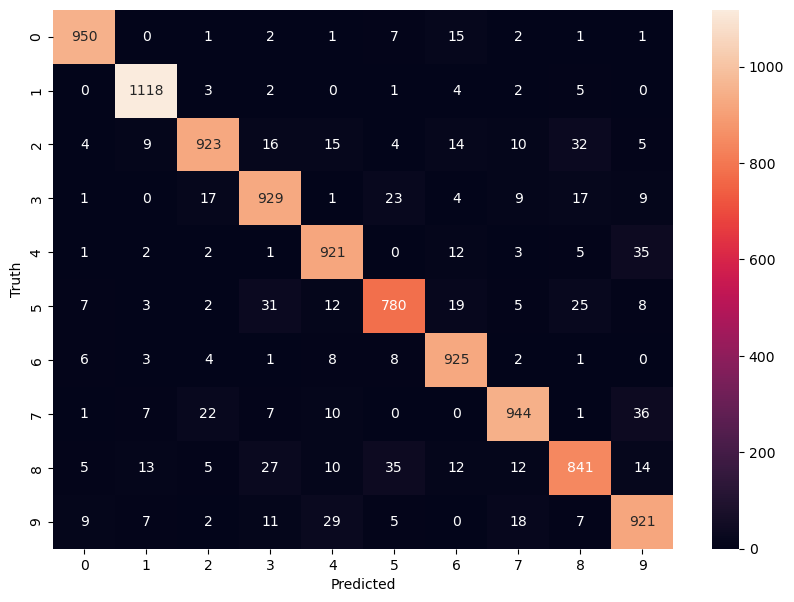

In [19]:
# above matrix doesnt give clear picture. Lets use some fancy way to explain this
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [115]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,), activation='relu'),
keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flatten,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2697 - accuracy: 0.9225
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1219 - accuracy: 0.9645
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0859 - accuracy: 0.9741
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0658 - accuracy: 0.9807
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0536 - accuracy: 0.9831
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0420 - accuracy: 0.9872
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0348 - accuracy: 0.9894
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0293 - accuracy: 0.9909
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0255 - accuracy: 0.9918
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.020

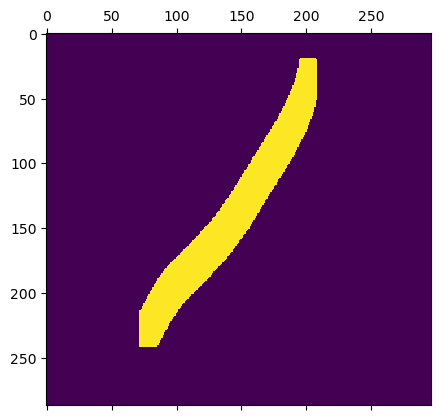

In [134]:
import cv2
img1 = cv2.imread(r'F:\Kaggle\1.jpg')
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

(thresh, im_bw) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
for i in range(0,im_bw.shape[0]):
    for j in range(0,im_bw.shape[1]):
        if im_bw[i][j]==255:
            im_bw[i][j]=0
        else:
            im_bw[i][j]=255
            
# Display the Binary Image
cv2.imshow("Binary Image",im_bw)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.matshow(im_bw)

In [135]:
def crop_square(img, size, interpolation=cv2.INTER_AREA):
    h, w = img.shape[:2]
    min_size = np.amin([h,w])

    # Centralize and crop
    crop_img = img[int(h/2-min_size/2):int(h/2+min_size/2), int(w/2-min_size/2):int(w/2+min_size/2)]
    resized = cv2.resize(crop_img, (size, size), interpolation=interpolation)

    return resized

In [136]:
test_image=crop_square(im_bw,28)
for i in range(test_image.shape[0]):
    for j in range(test_image.shape[1]):
        if test_image[i][j]>70:
            test_image[i][j]=255
                
    

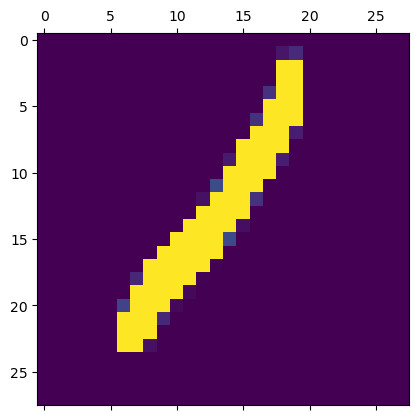

In [137]:
plt.matshow(test_image)


In [138]:
#test_image=z.copy()
test_image=test_image.reshape(1,28*28)

In [142]:
y_test_pred=model.predict(test_image)
y_test_pred

1/1 [==============================] - 0s 33ms/step


array([[0., 1., 1., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [143]:
np.argmax(y_test_pred)

1